In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df=pd.read_csv('country_wise_latest.csv')
df

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,West Bank and Gaza,10621,78,3752,6791,152,2,0,0.73,35.33,2.08,8916,1705,19.12,Eastern Mediterranean
183,Western Sahara,10,1,8,1,0,0,0,10.00,80.00,12.50,10,0,0.00,Africa
184,Yemen,1691,483,833,375,10,4,36,28.56,49.26,57.98,1619,72,4.45,Eastern Mediterranean
185,Zambia,4552,140,2815,1597,71,1,465,3.08,61.84,4.97,3326,1226,36.86,Africa


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country/Region          187 non-null    object 
 1   Confirmed               187 non-null    int64  
 2   Deaths                  187 non-null    int64  
 3   Recovered               187 non-null    int64  
 4   Active                  187 non-null    int64  
 5   New cases               187 non-null    int64  
 6   New deaths              187 non-null    int64  
 7   New recovered           187 non-null    int64  
 8   Deaths / 100 Cases      187 non-null    float64
 9   Recovered / 100 Cases   187 non-null    float64
 10  Deaths / 100 Recovered  187 non-null    float64
 11  Confirmed last week     187 non-null    int64  
 12  1 week change           187 non-null    int64  
 13  1 week % increase       187 non-null    float64
 14  WHO Region              187 non-null    ob

In [4]:
A = df[['Country/Region','Deaths']].sort_values(by=['Deaths'],ascending=False).head(10)
A

,Country/Region,Deaths
173,US,148011
23,Brazil,87618
177,United Kingdom,45844
111,Mexico,44022
85,Italy,35112
79,India,33408
61,France,30212
157,Spain,28432
132,Peru,18418
81,Iran,15912


Text(0.5, 1.0, 'Contries with most deaths')

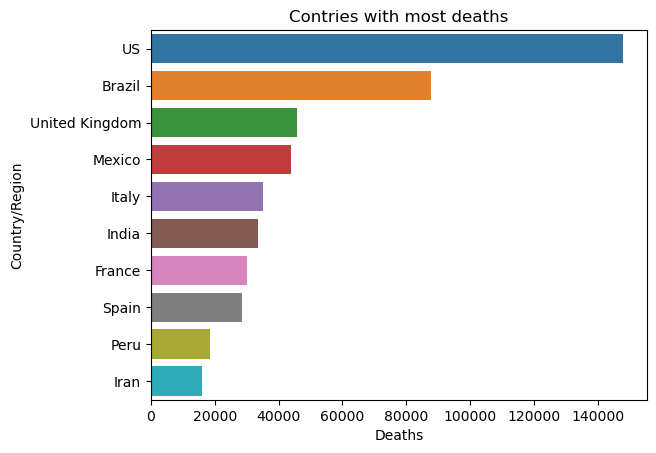

In [5]:
sns.barplot(data=A , y='Country/Region' , x ='Deaths')
plt.title("Contries with most deaths")

In [6]:
B = df[['Country/Region','Active']].sort_values(by=['Active'],ascending=False).head(10)
B

,Country/Region,Active
173,US,2816444
23,Brazil,508116
79,India,495499
177,United Kingdom,254427
138,Russia,201097
154,South Africa,170537
37,Colombia,117163
61,France,108928
32,Canada,107514
132,Peru,98752


<AxesSubplot:xlabel='Active', ylabel='Country/Region'>

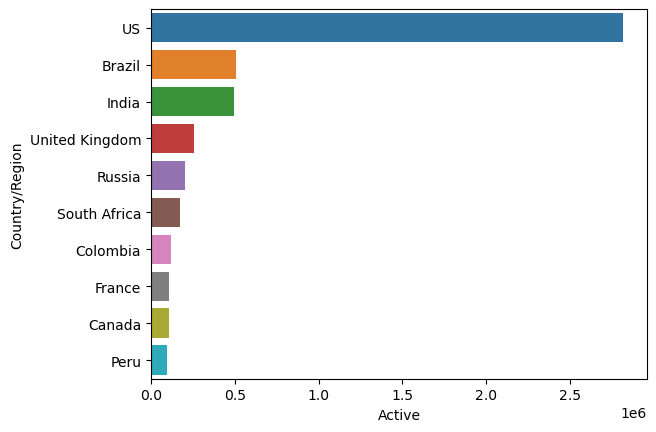

In [7]:
sns.barplot(data =B , x = 'Active', y ='Country/Region')

In [8]:
x=df['WHO Region'].value_counts()
print(x)

Europe                   56
Africa                   48
Americas                 35
Eastern Mediterranean    22
Western Pacific          16
South-East Asia          10
Name: WHO Region, dtype: int64


([<matplotlib.patches.Wedge at 0x23a6eb12be0>,
 [Text(0.6480579287518123, 0.8888312106254546, 'Europe'),
  Text(-0.9887634259123081, 0.48202374171627244, 'Africa'),
  Text(-0.6480579703610032, -0.8888311802876726, 'Americas'),
  Text(0.3539479259987883, -1.0414993354204105, 'Eastern Mediterranean'),
  Text(0.9048782868106089, -0.6254560624525897, 'Western Pacific'),
  Text(1.0845133446600084, -0.1839315232752723, 'South-East Asia')],
 [Text(0.35348614295553393, 0.48481702397752063, '30%'),
  Text(-0.5393255050430771, 0.26292204093614857, '26%'),
  Text(-0.3534861656514563, -0.48481700742963957, '19%'),
  Text(0.19306250509024817, -0.5680905465929511, '12%'),
  Text(0.49356997462396845, -0.34115785224686707, '9%'),
  Text(0.5915527334509136, -0.10032628542287578, '5%')])

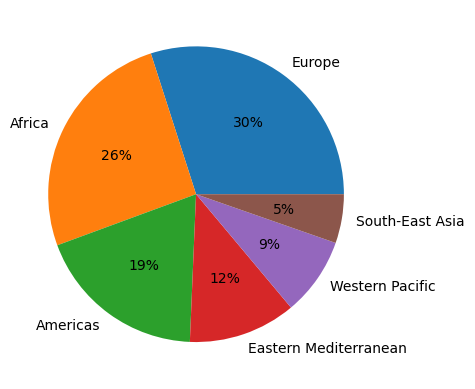

In [9]:
plt.pie(x,labels=x.index,autopct='%1.0f%%')

In [10]:

X = df.groupby('Country/Region')['Deaths'].sum()
Y = X.sort_values(ascending=False)
Z = Y[:5]
Z

Country/Region
US                148011
Brazil             87618
United Kingdom     45844
Mexico             44022
Italy              35112
Name: Deaths, dtype: int64

([<matplotlib.patches.Wedge at 0x23a6eb88460>,
 [Text(0.30539791594683857, 1.0567554650605446, 'US'),
  Text(-1.0779282281116207, -0.21925039347773628, 'Brazil'),
  Text(-0.22652803325819398, -1.0764223381870959, 'United Kingdom'),
  Text(0.5986705813731389, -0.9228182567539223, 'Mexico'),
  Text(1.0489358293547157, -0.3312606615581373, 'Italy')],
 [Text(0.1665806814255483, 0.5764120718512061, '41.0%'),
  Text(-0.5879608516972475, -0.11959112371512887, '24.3%'),
  Text(-0.12356074541356034, -0.5871394571929613, '12.7%'),
  Text(0.3265475898398939, -0.5033554127748666, '12.2%'),
  Text(0.5721468160116631, -0.1806876335771658, '9.7%')])

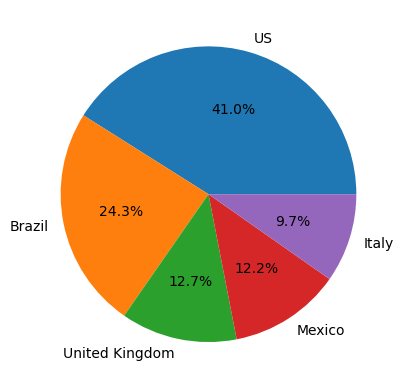

In [11]:
plt.pie(Z,labels=Z.index,autopct='%1.1f%%')

<AxesSubplot:xlabel='WHO Region', ylabel='Deaths'>

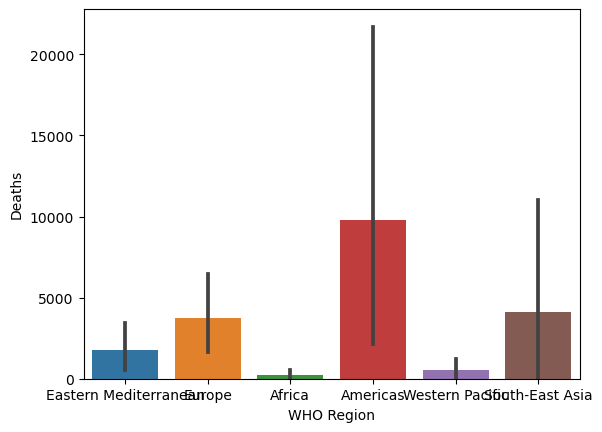

In [12]:
sns.barplot(x = "WHO Region", y = "Deaths", data = df)

In [13]:
Q=df.groupby('WHO Region')['New recovered'].sum()
print(Q)

WHO Region
Africa                   14563
Americas                 94776
Eastern Mediterranean    14843
Europe                   11732
South-East Asia          37582
Western Pacific           1127
Name: New recovered, dtype: int64


<AxesSubplot:xlabel='WHO Region', ylabel='New recovered'>

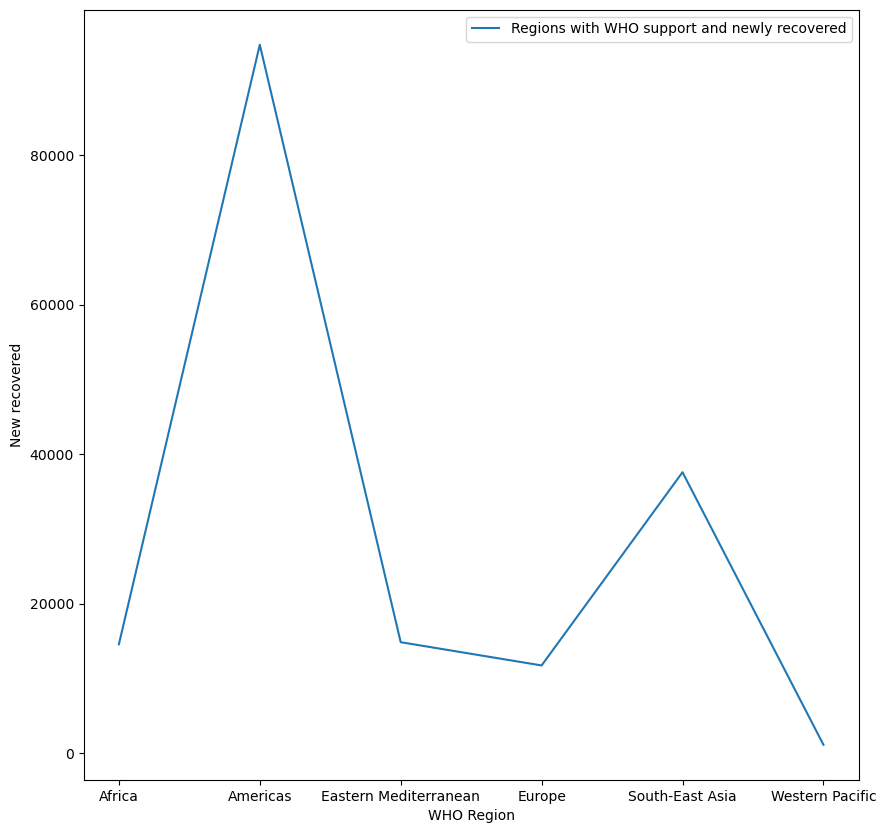

In [28]:
sns.lineplot(data = Q,label='Regions with WHO support and newly recovered')

Text(0.5, 1.0, 'Top 20 Country With Max Cases')

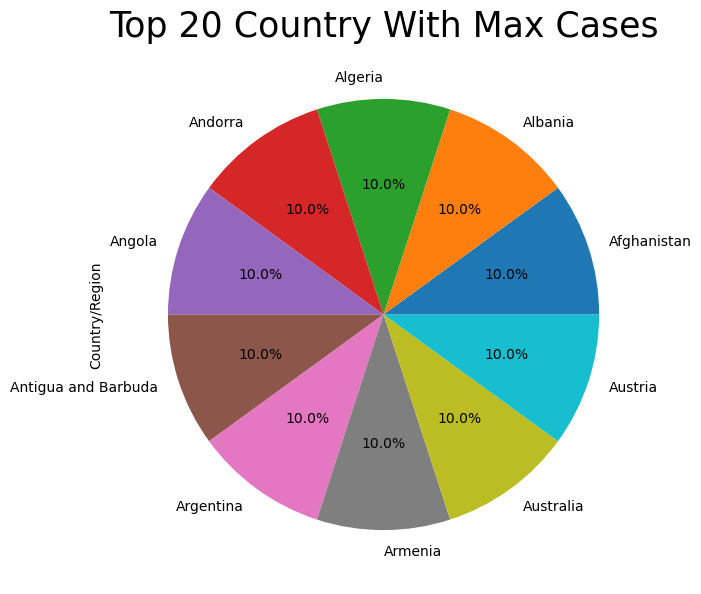

In [64]:
plt.figure(figsize=(7,7))
df['Country/Region'].head(10).value_counts().plot.pie(autopct="%1.1f%%")    
plt.title('Top 20 Country With Max Cases',fontsize=25)

In [15]:
pivot = df.pivot_table(index =['Confirmed', 'Recovered'], 
                       values =['Country/Region'], aggfunc ='sum')
print (pivot)

                            Country/Region
Confirmed Recovered                       
10        8                 Western Sahara
12        12                      Holy See
14        13                     Greenland
17        15         Saint Kitts and Nevis
18        18                      Dominica
...                                    ...
452529    274925              South Africa
816680    602249                    Russia
1480073   951166                     India
2442375   1846641                   Brazil
4290259   1325804                       US

[187 rows x 1 columns]
